In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
import scipy.linalg
import scipy.fft as spfft
from scipy.spatial.transform import Rotation as R
from importlib import reload

import util, plot
from util import *

In [35]:
reload(plot)
reload(util)
from util import *

In [15]:
x = np.zeros(shape=(N,2)) # amplitude, phase
y = np.empty((N,2))  # amplitude, phase
z = np.empty((N,2))  # amplitude, phase
N_sqrt = compute_N_sqrt()

# Discrete space, near-far field

### Point objects

Circular projector supresses square-artefacts

near False


(1.0, 0.6994989835806461)

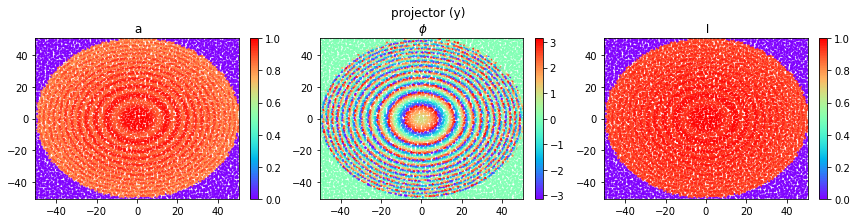

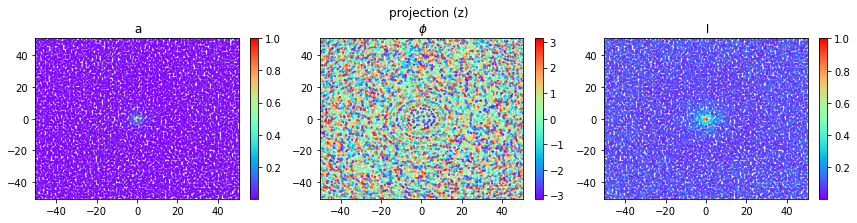

In [37]:
x_width = 1e2 * LAMBDA
y_width = 1e2 * LAMBDA
d1 = -1e2
N_x = 1
w = sample_grid(N_x, 0.5 * x_width)
v = sample_grid(N, y_width, d1 * LAMBDA, distribution='uniform')
# u = sample_grid(N, x_width, random='uniform')
u = sample_grid(N, 1e-0 * x_width, center=1, distribution='uniform')
print('near', near(y_width, d1 * LAMBDA))

x = object_grid(N_x)
x[:] = 0
x[0] = 1
# x[N//2 + N_sqrt//2, 0] = 1

for m in range(N):
    # source object
    c = sum_kernel(x,w,v[m], direction=-1)
    # plane wave
    c += f(0.001, 0, 0, np.ones(3).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)

# circular domain
for i,j in np.ndindex((N_sqrt, N_sqrt)):
    dy = y_width / N_sqrt
    y1 = (i-N_sqrt//2)
    y2 = (j-N_sqrt//2)
    if np.sqrt(y1**2 + y2**2) >= y_width / 2:
        y[i+j*N_sqrt,:] = 0
    
normalize_amplitude(y)
map_sum_kernel(y,z,v,u)
normalize_amplitude(z)

plot.scatter_multiple(y, v, 'projector (y)', s=2)
plot.scatter_multiple(z, u, 'projection (z)', s=2)
a = y[:,0]
a.max(), a.mean()

near False


(0.9999999999999999, 0.4655698313588532)

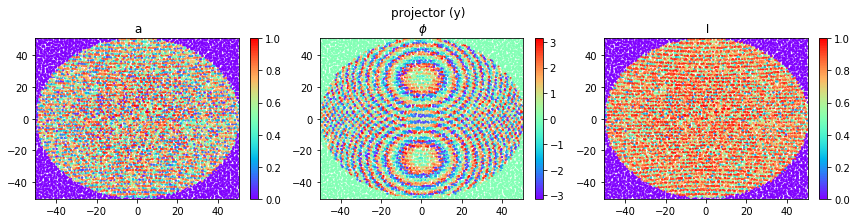

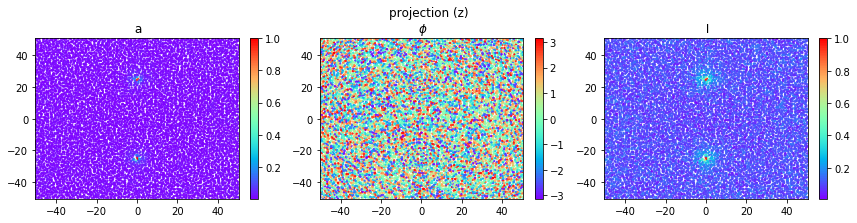

In [42]:
x_width = 1e2 * LAMBDA
y_width = 1e2 * LAMBDA
d1 = -1e2
N_x = 2
w = sample_grid(N_x, 0.5 * x_width)
v = sample_grid(N, y_width, d1 * LAMBDA, distribution='uniform')
# u = sample_grid(N, x_width, distribution='uniform')
u = sample_grid(N, 1e-0 * x_width, center=1, distribution='uniform')
print('near', near(y_width, d1 * LAMBDA))

x = object_grid(N_x)
# x[:] = 0
x[:,0] = 1
# x[N//2 + N_sqrt//2, 0] = 1

for m in range(N):
    # source object
    c = sum_kernel(x,w,v[m], direction=-1)
    # plane wave
    c += f(0.001, 0, 0, np.ones(3).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)

# circular domain
for i,j in np.ndindex((N_sqrt, N_sqrt)):
    dy = y_width / N_sqrt
    y1 = (i-N_sqrt//2)
    y2 = (j-N_sqrt//2)
    if np.sqrt(y1**2 + y2**2) >= y_width / 2:
        y[i+j*N_sqrt,:] = 0
    
normalize_amplitude(y)
map_sum_kernel(y,z,v,u)
normalize_amplitude(z)

plot.scatter_multiple(y, v, 'projector (y)', s=2)
plot.scatter_multiple(z, u, 'projection (z)', s=2)
a = y[:,0]
a.max(), a.mean()

near False


(1.0, 0.6185797610968199)

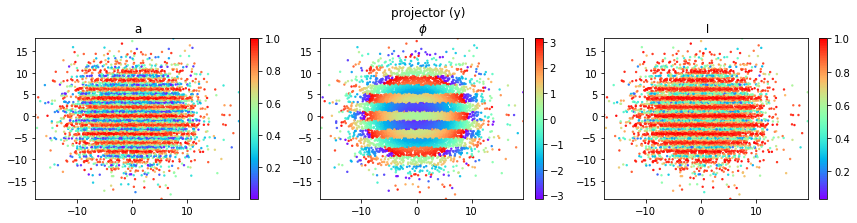

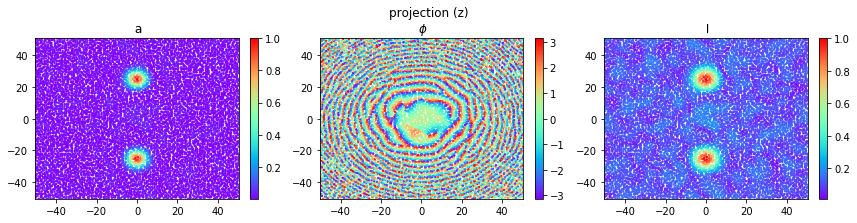

In [68]:
x_width = 1e2 * LAMBDA
y_width = 1e2 * LAMBDA
d1 = -1e2
N_x = 2
w = sample_grid(N_x, 0.5 * x_width)
# v = sample_grid(N, y_width, d1 * LAMBDA, random='uniform')
v = np.random.normal(0, 0.05 * x_width, size=(N,3))
# reset z dim
v[:,-1] = d1

# u = sample_grid(N, x_width, distribution='uniform')
u = sample_grid(N, 1e0 * x_width, center=1, distribution='uniform')
# u = np.random.normal(0, 0.5 * x_width, size=(N,3))
# u[:,-1] = 0 
print('near', near(y_width, d1 * LAMBDA))

x = object_grid(N_x)
# x[:] = 0
x[:,0] = 1
# x[N//2 + N_sqrt//2, 0] = 1

for m in range(N):
    # source object
    c = sum_kernel(x,w,v[m], direction=-1)
    # plane wave
    c += f(0.001, 0, 0, np.ones(3).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)

# # circular domain
# for i,j in np.ndindex((N_sqrt, N_sqrt)):
#     dy = y_width / N_sqrt
#     y1 = (i-N_sqrt//2)
#     y2 = (j-N_sqrt//2)
#     if np.sqrt(y1**2 + y2**2) >= y_width / 2:
#         y[i+j*N_sqrt,:] = 0
    
normalize_amplitude(y)
map_sum_kernel(y,z,v,u)
normalize_amplitude(z)

plot.scatter_multiple(y, v, 'projector (y)', s=2)
plot.scatter_multiple(z, u, 'projection (z)', s=2)
a = y[:,0]
a.max(), a.mean()

# Phase distribution

Hist of phases at a single point in space

near False


(1.0, 0.8791328764047533)

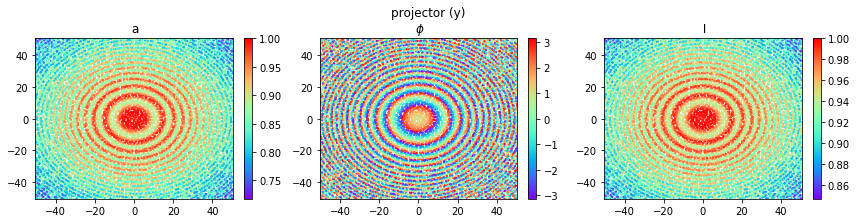

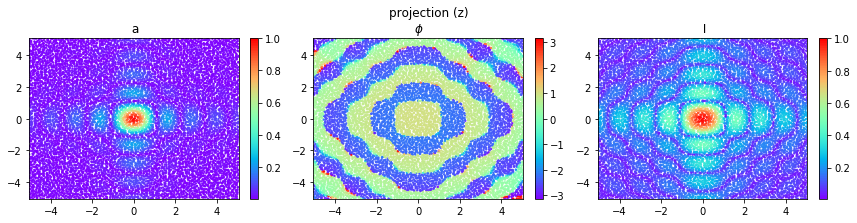

In [16]:
x_width = 1e1 * LAMBDA
y_width = 1e2 * LAMBDA
d1 = -1e2
N_x = 1
w = sample_grid(N_x, 0.5 * x_width)
v = sample_grid(N, y_width, d1 * LAMBDA, distribution='uniform')
# u = sample_grid(N, x_width, distribution='uniform')
u = sample_grid(N, x_width, center=1, distribution='uniform')
print('near', near(y_width, d1 * LAMBDA))

x = object_grid(N_x)
x[:] = 0
x[0] = 1
# x[N//2 + N_sqrt//2, 0] = 1

for m in range(N):
    # source object
    c = sum_kernel(x,w,v[m], direction=-1)
    # plane wave
    c += f(0.001, 0, 0, np.ones(3).reshape(1,-1))
    y[m, :] = from_polar(c, distance=1)
    
normalize_amplitude(y)
map_sum_kernel(y,z,v,u)
normalize_amplitude(z)

plot.scatter_multiple(y, v, 'projector (y)', s=2)
plot.scatter_multiple(z, u, 'projection (z)', s=2)
a = y[:,0]
a.max(), a.mean()

## Entropy
Entropy of angle, length for every point in space

TODO use regularity/periodicity measure

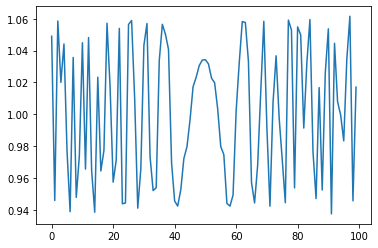

In [17]:
# a = f(y[:, 0], y[:, 1], v, 0)
a = f(y[N//2:N//2+N_sqrt, 0], y[N//2:N//2+N_sqrt, 1], v[N//2:N//2+N_sqrt], 0)
plt.plot(np.angle(a[:300]));

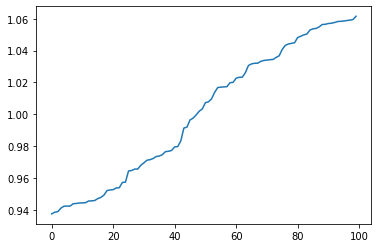

In [18]:
plt.plot(sorted(np.angle(a)));

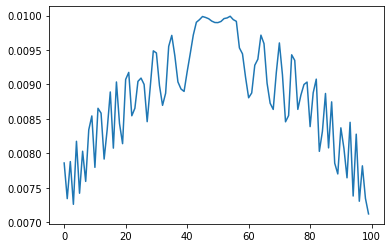

In [19]:
plt.plot(np.abs(a[:300]));

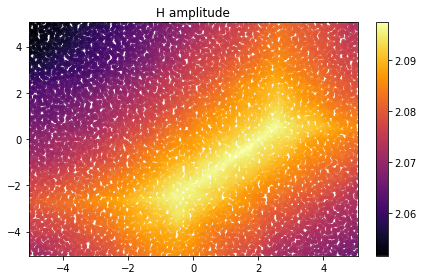

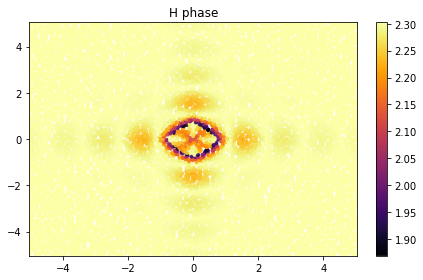

In [90]:
# H = np.empty((N,2))
# dx = x_width/n / 2
# w2 = sample_grid(N, x_width, distribution='uniform')
# for i in range(p.size):
#     a = f(y[:, 0], y[:, 1], v, w2[i])

#     hist, bin_edges = np.histogram(np.abs(a), density=True)
#     pdf = hist * (bin_edges[1:] - bin_edges[:-1] )
#     H[i,0] = scipy.stats.entropy(pdf)

#     hist, bin_edges = np.histogram(np.angle(a), density=True)
#     pdf = hist * (bin_edges[1:] - bin_edges[:-1] )
#     H[i,1] = scipy.stats.entropy(pdf)


cmap = 'inferno'
plot.scatter(H[:,0], w2, title='H amplitude', cmap=cmap);
plot.scatter(H[:,1], w2, title='H phase', cmap=cmap);

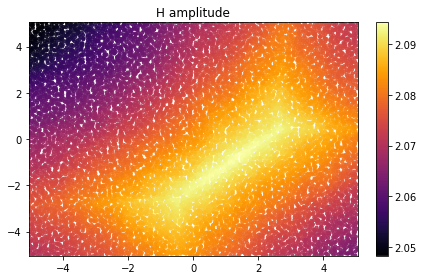

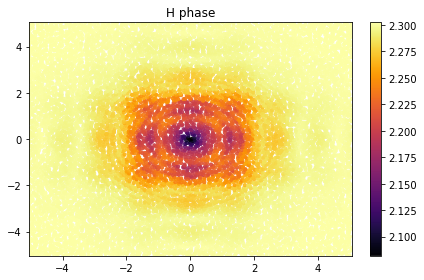

In [91]:
H = np.empty((N,2))
dx = x_width/n / 2
w2 = sample_grid(N, x_width, 5 * LAMBDA, distribution='uniform')
for i in range(p.size):
    a = f(y[:, 0], y[:, 1], v, w2[i])

    hist, bin_edges = np.histogram(np.abs(a), density=True)
    pdf = hist * (bin_edges[1:] - bin_edges[:-1] )
    H[i,0] = scipy.stats.entropy(pdf)

    hist, bin_edges = np.histogram(np.angle(a), density=True)
    pdf = hist * (bin_edges[1:] - bin_edges[:-1] )
    H[i,1] = scipy.stats.entropy(pdf)


plot.scatter(H[:,0], w2, title='H amplitude', cmap=cmap);
plot.scatter(H[:,1], w2, title='H phase', cmap=cmap);

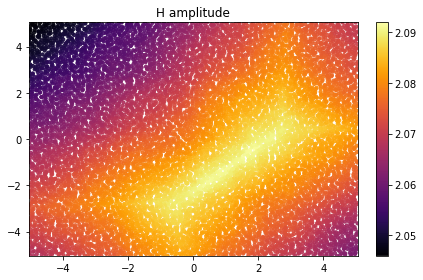

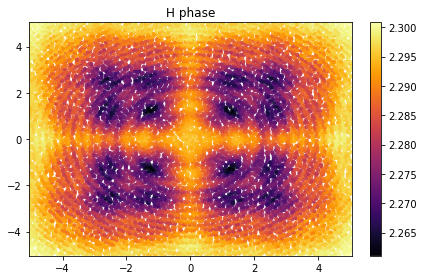

In [95]:
H = np.empty((N,2))
dx = x_width/n / 2
w2 = sample_grid(N, x_width, 1e1 * LAMBDA, distribution='uniform')
for i in range(p.size):
    a = f(y[:, 0], y[:, 1], v, w2[i])

    hist, bin_edges = np.histogram(np.abs(a), density=True)
    pdf = hist * (bin_edges[1:] - bin_edges[:-1] )
    H[i,0] = scipy.stats.entropy(pdf)

    hist, bin_edges = np.histogram(np.angle(a), density=True)
    pdf = hist * (bin_edges[1:] - bin_edges[:-1] )
    H[i,1] = scipy.stats.entropy(pdf)


plot.scatter(H[:,0], w2, title='H amplitude', cmap=cmap);
plot.scatter(H[:,1], w2, title='H phase', cmap=cmap);

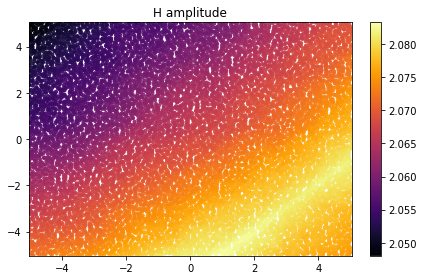

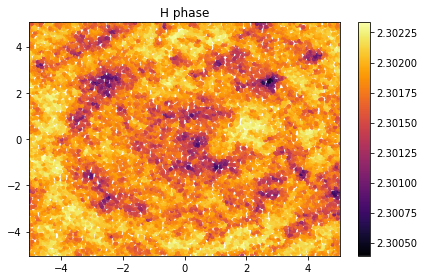

In [99]:
H = np.empty((N,2))
dx = x_width/n / 2
w2 = sample_grid(N, x_width, 1e2 * LAMBDA, distribution='uniform')
for i in range(p.size):
    a = f(y[:, 0], y[:, 1], v, w2[i])

    hist, bin_edges = np.histogram(np.abs(a), density=True)
    pdf = hist * (bin_edges[1:] - bin_edges[:-1] )
    H[i,0] = scipy.stats.entropy(pdf)

    hist, bin_edges = np.histogram(np.angle(a), density=True)
    pdf = hist * (bin_edges[1:] - bin_edges[:-1] )
    H[i,1] = scipy.stats.entropy(pdf)


plot.scatter(H[:,0], w2, title='H amplitude', cmap=cmap);
plot.scatter(H[:,1], w2, title='H phase', cmap=cmap);

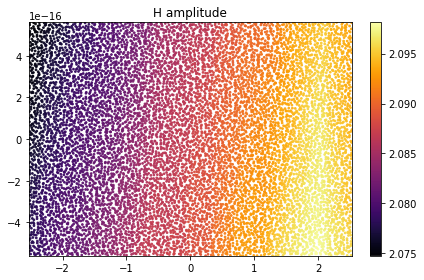

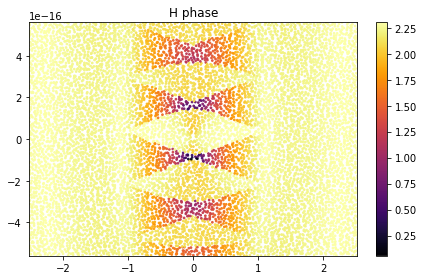

In [98]:
H = np.empty((N,2))
dx = x_width/n / 2
w2 = sample_grid(N, 0.5 * x_width, distribution='uniform')
w2 = R.from_euler('Y', -90, degrees=True).apply(w2)
for i in range(p.size):
    a = f(y[:, 0], y[:, 1], v, w2[i])

    hist, bin_edges = np.histogram(np.abs(a), density=True)
    pdf = hist * (bin_edges[1:] - bin_edges[:-1] )
    H[i,0] = scipy.stats.entropy(pdf)

    hist, bin_edges = np.histogram(np.angle(a), density=True)
    pdf = hist * (bin_edges[1:] - bin_edges[:-1] )
    H[i,1] = scipy.stats.entropy(pdf)


plot.scatter(H[:,0], w2, title='H amplitude', cmap=cmap, s=3);
plot.scatter(H[:,1], w2, title='H phase', cmap=cmap, s=3); # cubehelix ocean

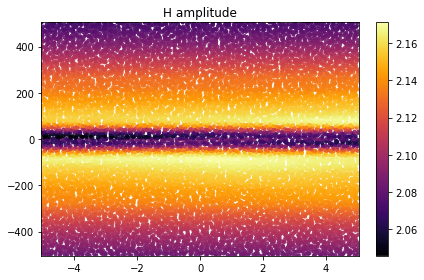

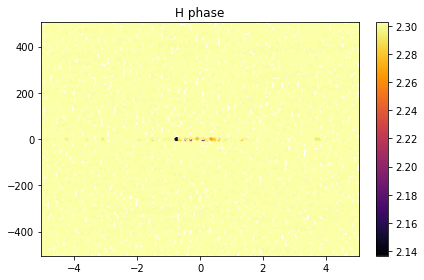

In [97]:
H = np.empty((N,2))
w2 = sample_grid(N, x_width, 0, distribution='uniform')
w2[:,0] *= 1e2
for i in range(p.size):
    a = f(y[:, 0], y[:, 1], v, w2[i])

    hist, bin_edges = np.histogram(np.abs(a), density=True)
    pdf = hist * (bin_edges[1:] - bin_edges[:-1] )
    H[i,0] = scipy.stats.entropy(pdf)

    hist, bin_edges = np.histogram(np.angle(a), density=True)
    pdf = hist * (bin_edges[1:] - bin_edges[:-1] )
    H[i,1] = scipy.stats.entropy(pdf)


plot.scatter(H[:,0], w2, title='H amplitude', cmap=cmap);
plot.scatter(H[:,1], w2, title='H phase', cmap=cmap);

9.01602433293849


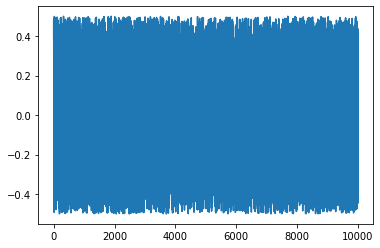

In [22]:
a = f(y[:, 0], y[:, 1], u, np.array([0,0,0]))
phase = np.angle(a) + np.pi
H = scipy.stats.entropy(phase / phase.sum())
print(H)
plt.plot(np.angle(a) / 2 / np.pi)

In [23]:
np.angle(a) / np.angle(a).sum()

array([-0.00241007, -0.00299395, -0.00140514, ...,  0.00041018,
       -0.00118471,  0.00119123])

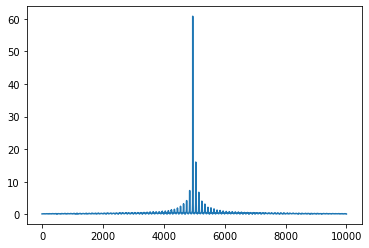

In [24]:
plt.plot(np.abs(a))

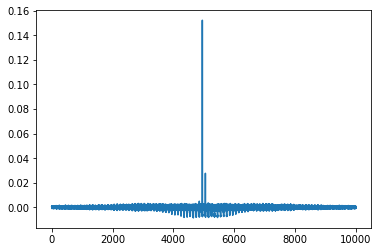

In [25]:
plt.plot(np.abs(a) / np.abs(a).max() * np.angle(a) / 2 / np.pi)

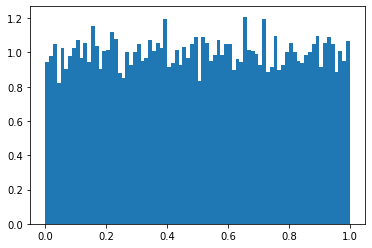

In [26]:
b = np.random.random(10000)
# hist, bin_edges = np.histogram(b, density=True)
# hist * (bin_edges[1:] - bin_edges[:-1] )
plt.hist(b, bins=80, density=1);